# **Astrophysical Computations & Algorithms**
## *TA Week 12*

## *Announcement*
Quiz 5/28

범위 : Week7,8,11

오프라인(필기구 지참), 시간 10분

---

Quiz 6/4

범위 : TBD 

## HW13
<img src='HW13.png' width='600'>

In [5]:
import numpy as np
import matplotlib.pyplot as plt

### **How to implement FT?**
$H_{n} \;=\; \sum_{k=0}^{N-1} h_{k}\,e^{-2\pi i \,k n / N}$

### `1. 이중 for-loop`

N개의 $H_k$ 를 계산하기 위한 for loop와 $\Sigma$를 계산하기 위한 for loop 가 필요

### `2.벡터화 vectorization`

### *Hint*
- 식을 행렬곱으로 표현해보기. 

- exponential term을 어떻게 array(matrix)로 구현할 것인가? -> `np.meshgrid()`, `numpy broadcasting`

$$
\begin{bmatrix}
H_0 \\[6pt]
H_1 \\[6pt]
\vdots \\[4pt]
H_{N-1}
\end{bmatrix}
=
\begin{bmatrix}
e^{-2\pi i\,0\cdot0/N} & e^{-2\pi i\,0\cdot1/N} & \cdots & e^{-2\pi i\,0\,(N-1)/N} \\[6pt]
e^{-2\pi i\,1\cdot0/N} & e^{-2\pi i\,1\cdot1/N} & \cdots & e^{-2\pi i\,1\,(N-1)/N} \\[6pt]
\vdots & \vdots & \ddots & \vdots \\[4pt]
e^{-2\pi i\,(N-1)\cdot0/N} & e^{-2\pi i\,(N-1)\cdot1/N} & \cdots & e^{-2\pi i\,(N-1)\,(N-1)/N}
\end{bmatrix}
\begin{bmatrix}
h_0 \\[4pt]
h_1 \\[4pt]
\vdots \\[2pt]
h_{N-1}
\end{bmatrix}
$$


$$
\begin{bmatrix}
H_{0} & H_{1} & \cdots & H_{N-1}
\end{bmatrix}
=
\begin{bmatrix}
h_{0} & h_{1} & \cdots & h_{N-1}
\end{bmatrix}
\;
\begin{bmatrix}
e^{-2\pi i\,0\cdot0/N} & e^{-2\pi i\,0\cdot1/N} & \cdots & e^{-2\pi i\,0\,(N-1)/N} \\[6pt]
e^{-2\pi i\,1\cdot0/N} & e^{-2\pi i\,1\cdot1/N} & \cdots & e^{-2\pi i\,1\,(N-1)/N} \\[6pt]
\vdots                 & \vdots                 & \ddots & \vdots                   \\[4pt]
e^{-2\pi i\,(N-1)\cdot0/N} & e^{-2\pi i\,(N-1)\cdot1/N} & \cdots & e^{-2\pi i\,(N-1)\,(N-1)/N}
\end{bmatrix}
$$


`np.meshgrid`

In [51]:
n, k = np.meshgrid(np.arange(10), np.arange(10))
print(f'k\n {k}')
print('-'*50)

print(f'n\n {n}')
print('-'*50)

print(f'k*n\n {k*n}')
print('-'*50)

k
 [[0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1]
 [2 2 2 2 2 2 2 2 2 2]
 [3 3 3 3 3 3 3 3 3 3]
 [4 4 4 4 4 4 4 4 4 4]
 [5 5 5 5 5 5 5 5 5 5]
 [6 6 6 6 6 6 6 6 6 6]
 [7 7 7 7 7 7 7 7 7 7]
 [8 8 8 8 8 8 8 8 8 8]
 [9 9 9 9 9 9 9 9 9 9]]
--------------------------------------------------
n
 [[0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]]
--------------------------------------------------
k*n
 [[ 0  0  0  0  0  0  0  0  0  0]
 [ 0  1  2  3  4  5  6  7  8  9]
 [ 0  2  4  6  8 10 12 14 16 18]
 [ 0  3  6  9 12 15 18 21 24 27]
 [ 0  4  8 12 16 20 24 28 32 36]
 [ 0  5 10 15 20 25 30 35 40 45]
 [ 0  6 12 18 24 30 36 42 48 54]
 [ 0  7 14 21 28 35 42 49 56 63]
 [ 0  8 16 24 32 40 48 56 64 72]
 [ 0  9 18 27 36 45 54 63 72 81]]
--------------------------------------------------


`numpy broadcasting`

In [136]:
n = np.arange(10)             
k = n.reshape(10, 1)    
print(f'k\n {k}')
print('-'*50)

print(f'n\n {n}')
print('-'*50)

print(f'k*n\n {k*n}')
print('-'*50) 
  

k
 [[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
--------------------------------------------------
n
 [0 1 2 3 4 5 6 7 8 9]
--------------------------------------------------
k*n
 [[ 0  0  0  0  0  0  0  0  0  0]
 [ 0  1  2  3  4  5  6  7  8  9]
 [ 0  2  4  6  8 10 12 14 16 18]
 [ 0  3  6  9 12 15 18 21 24 27]
 [ 0  4  8 12 16 20 24 28 32 36]
 [ 0  5 10 15 20 25 30 35 40 45]
 [ 0  6 12 18 24 30 36 42 48 54]
 [ 0  7 14 21 28 35 42 49 56 63]
 [ 0  8 16 24 32 40 48 56 64 72]
 [ 0  9 18 27 36 45 54 63 72 81]]
--------------------------------------------------


In [81]:
def dft(x):
    N = x.shape[0]
    n = np.arange(N)             
    k = n.reshape(N, 1)         
    W = np.exp(-2j * np.pi * k * n / N) 
    X = W@x
    return X

## HW14
<img src='HW14.png' width='600'>

In [82]:
import wavio

In [83]:
wav = wavio.read('Do262.wav')
data = wav.data
rate = wav.rate

In [66]:
print(data.shape) # (N_data, N_channel)
print(rate)  # sampling rate 44100Hz

(52992, 1)
44100


In [67]:
# (52992,1) -> (52992,)
sound = data.flatten()
print(sound.shape)

# Otherwise,
print(data[:,0].shape)

(52992,)
(52992,)


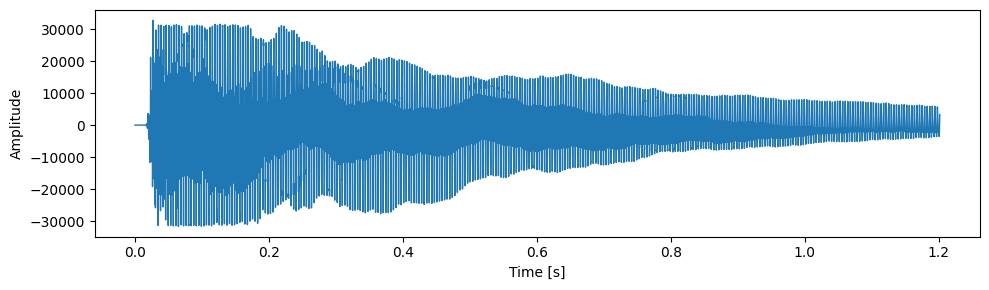

In [68]:
t = np.arange(len(sound)) / rate
plt.figure(figsize=(10, 3))
plt.plot(t, sound, linewidth=1)
# plt.xlim()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

In [69]:
X = np.fft.fft(sound)
power = np.abs(X)**2
freqs = np.fft.fftfreq(len(sound))*rate

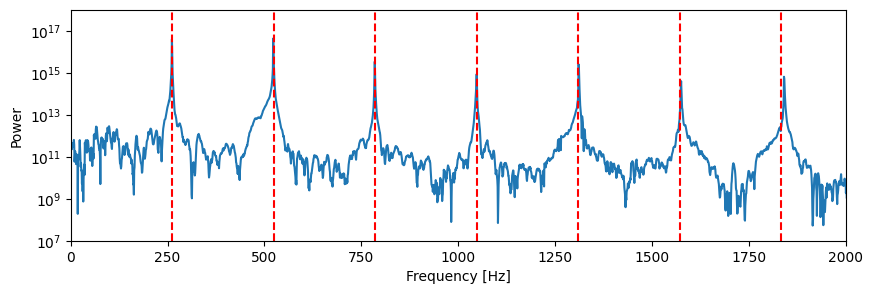

In [70]:
plt.figure(figsize=(10,3))
plt.plot(freqs, power)
plt.xlim(0,2000)
plt.ylim(1e7,1e18)
plt.yscale('log')
plt.xlabel("Frequency [Hz]")
plt.ylabel("Power")
plt.vlines((np.arange(7)+1)*262, ymin=1e7,ymax=1e18, colors='red', linestyle='dashed')


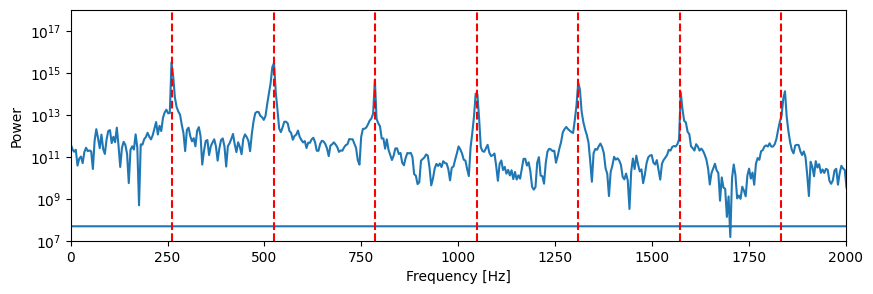

In [137]:
X = dft(sound[:10000])
power = np.abs(X)**2
freqs = np.fft.fftfreq(len(sound[:10000]))*rate
plt.figure(figsize=(10,3))
plt.plot(freqs, power)
plt.xlim(0,2000)
plt.ylim(1e7,1e18)
plt.yscale('log')
plt.xlabel("Frequency [Hz]")
plt.ylabel("Power")
plt.vlines((np.arange(7)+1)*262, ymin=1e7,ymax=1e18, colors='red', linestyle='dashed')

---

## HW15
<img src='HW15.png' width='600'>

### `np.fft.fftfreq`
### `np.fft.fftshift`


In [ ]:
import astropy.io.fits as fits
import numpy.fft as fft
from matplotlib.colors import LogNorm

In [127]:
image = fits.open('image3.fits')[0].data

In [128]:
ft = np.fft.fft2(image)
ft_shift = fft.fftshift(ft)

In [129]:
ift = np.fft.ifft2(ft)
ift_shift = fft.ifft2(ft_shift)

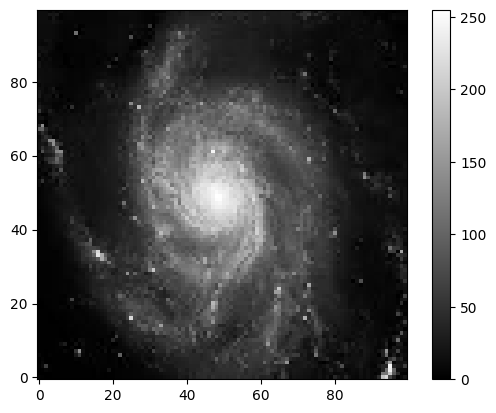

In [130]:
plt.imshow(image, origin='lower', cmap='gray')
plt.colorbar()

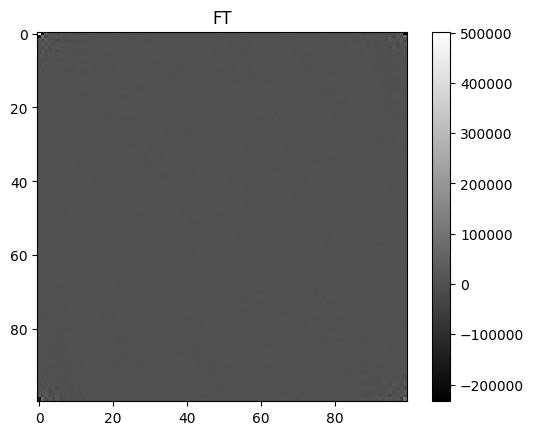

In [131]:
plt.imshow(ft.real, cmap='gray')
plt.title('FT')
plt.colorbar()

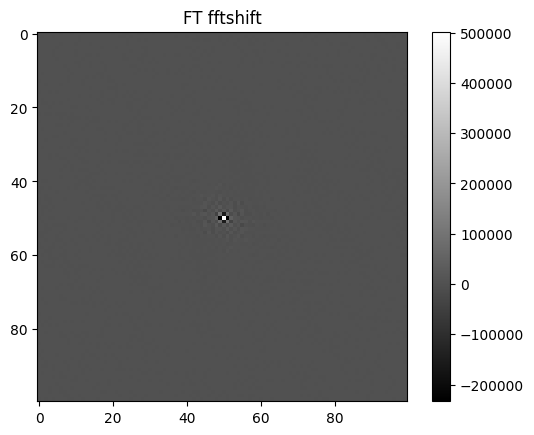

In [132]:
plt.imshow(ft_shift.real, cmap='gray')
plt.title('FT fftshift')
plt.colorbar()

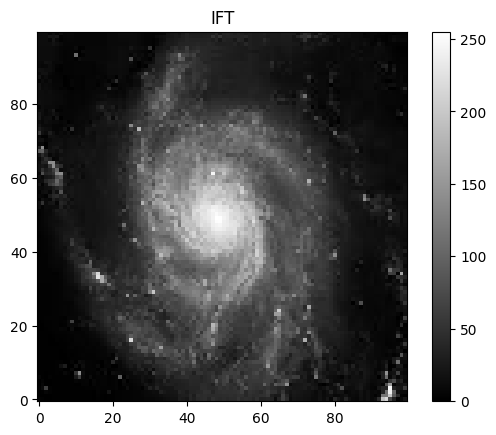

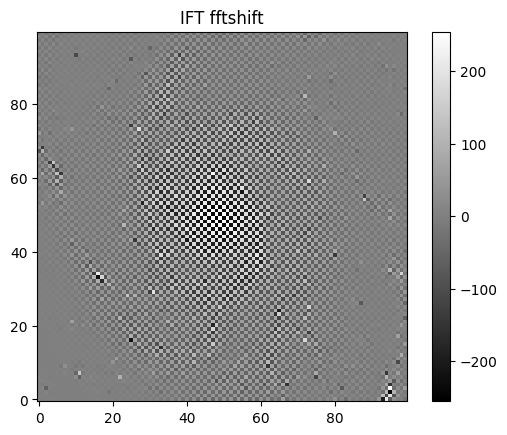

In [133]:
plt.imshow(ift.real, cmap='gray', origin='lower')
plt.title('IFT')
plt.colorbar(); plt.show()

plt.imshow(ift_shift.real, cmap='gray', origin='lower')
plt.title('IFT fftshift')
plt.colorbar()